In [274]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

warnings.filterwarnings("ignore")

%matplotlib inline

In [275]:
games = pd.read_csv("games.csv")
vgsales = pd.read_csv("vgsales.csv")

In [276]:
games.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [277]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Data Cleaning

Check null values

In [278]:
games.isnull().sum()
vgsales.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [279]:
num_cols_games = ['Rating', 'Plays', 'Backlogs', 'Wishlist']
games[num_cols_games] = games[num_cols_games].fillna(0)

num_cols_sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
vgsales[num_cols_sales] = vgsales[num_cols_sales].fillna(0)


In [280]:
games['Genres'].fillna('Unknown', inplace=True)
games['Team'].fillna('Unknown', inplace=True)

vgsales['Genre'].fillna('Unknown', inplace=True)
vgsales['Publisher'].fillna('Unknown', inplace=True)
vgsales['Platform'].fillna('Unknown', inplace=True)


In [281]:
games['Release Date'] = pd.to_datetime(
    games['Release Date'], errors='coerce'
)

games['Release Date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


In [282]:
games['Release Date'].dtype


dtype('<M8[ns]')

Check DUplicates

In [283]:
games.duplicated().sum()
vgsales.duplicated().sum()


0

In [284]:
games.drop_duplicates(inplace=True)
vgsales.drop_duplicates(inplace=True)


In [285]:
games.isnull().sum()
vgsales.isnull().sum()



Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [286]:
vgsales['Year'].isnull().sum()


271

Convert Year to numeric

In [287]:
vgsales['Year'] = pd.to_numeric(
    vgsales['Year'],
    errors='coerce'
)


Fill with 0 (if year is not critical)

In [288]:
vgsales['Year'].fillna(0, inplace=True)


Convert Year to integer

In [289]:
vgsales['Year'] = vgsales['Year'].astype(int)


Covert k str to integer - Games

In [290]:
def convert_k_to_number(x):
    if isinstance(x, str):
        x = x.strip()
        if x.endswith("K"):
            return float(x[:-1]) * 1000  # 4.6K -> 4600
        else:
            return float(x)  # already a number string
    return x  # if already numeric


In [291]:
cols_with_k = [
    'Times Listed',
    'Backlogs',
    'Number of Reviews',
    'Playing',
    'Plays',
    'Wishlist'
]

for col in cols_with_k:
    games[col] = games[col].apply(convert_k_to_number)


In [292]:
games.to_csv("games_cleaned.csv", index=False)


In [293]:
games = pd.read_csv("games_cleaned.csv")


In [294]:
games.isnull().sum
vgsales.isnull().sum()
games.isnull().values.any()
vgsales.isnull().values.any()



False

Merge games and vgsales data

In [295]:
games = pd.read_csv("games_cleaned.csv")
vgsales = pd.read_csv("vgsales_cleaned.csv")

games.columns = games.columns.str.strip()
vgsales.columns = vgsales.columns.str.strip()

def normalize_title(x):
    return (
        str(x)
        .lower()
        .strip()
        .replace(":", "")
        .replace("-", "")
        .replace(".", "")
    )

games['merge_key'] = games['Title'].apply(normalize_title)
vgsales['merge_key'] = vgsales['Name'].apply(normalize_title)

merged_data = pd.merge(
    games,
    vgsales,
    on='merge_key',
    how='left'
)

merged_data.drop(columns=['merge_key', 'Name'], inplace=True)



In [296]:
print(merged_data.shape)
merged_data.head()
merged_data.isnull().sum()


(2269, 24)


Unnamed: 0             0
Title                  0
Release Date           0
Team                   0
Rating                 0
Times Listed           0
Number of Reviews      0
Genres                 0
Summary                1
Reviews                0
Plays                  0
Playing                0
Backlogs               0
Wishlist               0
Rank                 846
Platform             846
Year                 846
Genre                846
Publisher            846
NA_Sales             846
EU_Sales             846
JP_Sales             846
Other_Sales          846
Global_Sales         846
dtype: int64

In [297]:
sales_cols = [
    'NA_Sales', 'EU_Sales', 'JP_Sales',
    'Other_Sales', 'Global_Sales', 'Rank', 'Platform','Year','Genre', 'Publisher','Summary']

merged_data[sales_cols] = merged_data[sales_cols].fillna(0)


In [298]:
print(merged_data.shape)
merged_data.head()
merged_data.isnull().sum()

(2269, 24)


Unnamed: 0           0
Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
Rank                 0
Platform             0
Year                 0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

Covert k str to integer - Games and vg sales merged

In [299]:
cols_with_k = [
     'Plays'
]

for col in cols_with_k:
    games[col] = games[col].apply(convert_k_to_number)

In [300]:
merged_data.to_csv("games_sales_merged.csv", index=False)


In [301]:
merged_data = pd.read_csv("games_sales_merged.csv")

Split the Numeric and Categorical 

In [302]:
numeric_features_games = [feature for feature in games.columns if games[feature].dtype != 'O']
categorical_features_games = [feature for feature in games.columns if games[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features_games), numeric_features_games))
print('\nWe have {} categorical features : {}'.format(len(categorical_features_games), categorical_features_games))

numeric_features_vgsales = [feature for feature in vgsales.columns if vgsales[feature].dtype != 'O']
categorical_features_vgsales = [feature for feature in vgsales.columns if vgsales[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features_vgsales), numeric_features_vgsales))
print('\nWe have {} categorical features : {}'.format(len(categorical_features_vgsales), categorical_features_vgsales))

We have 8 numerical features : ['Unnamed: 0', 'Rating', 'Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

We have 7 categorical features : ['Title', 'Release Date', 'Team', 'Genres', 'Summary', 'Reviews', 'merge_key']
We have 7 numerical features : ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

We have 5 categorical features : ['Name', 'Platform', 'Genre', 'Publisher', 'merge_key']


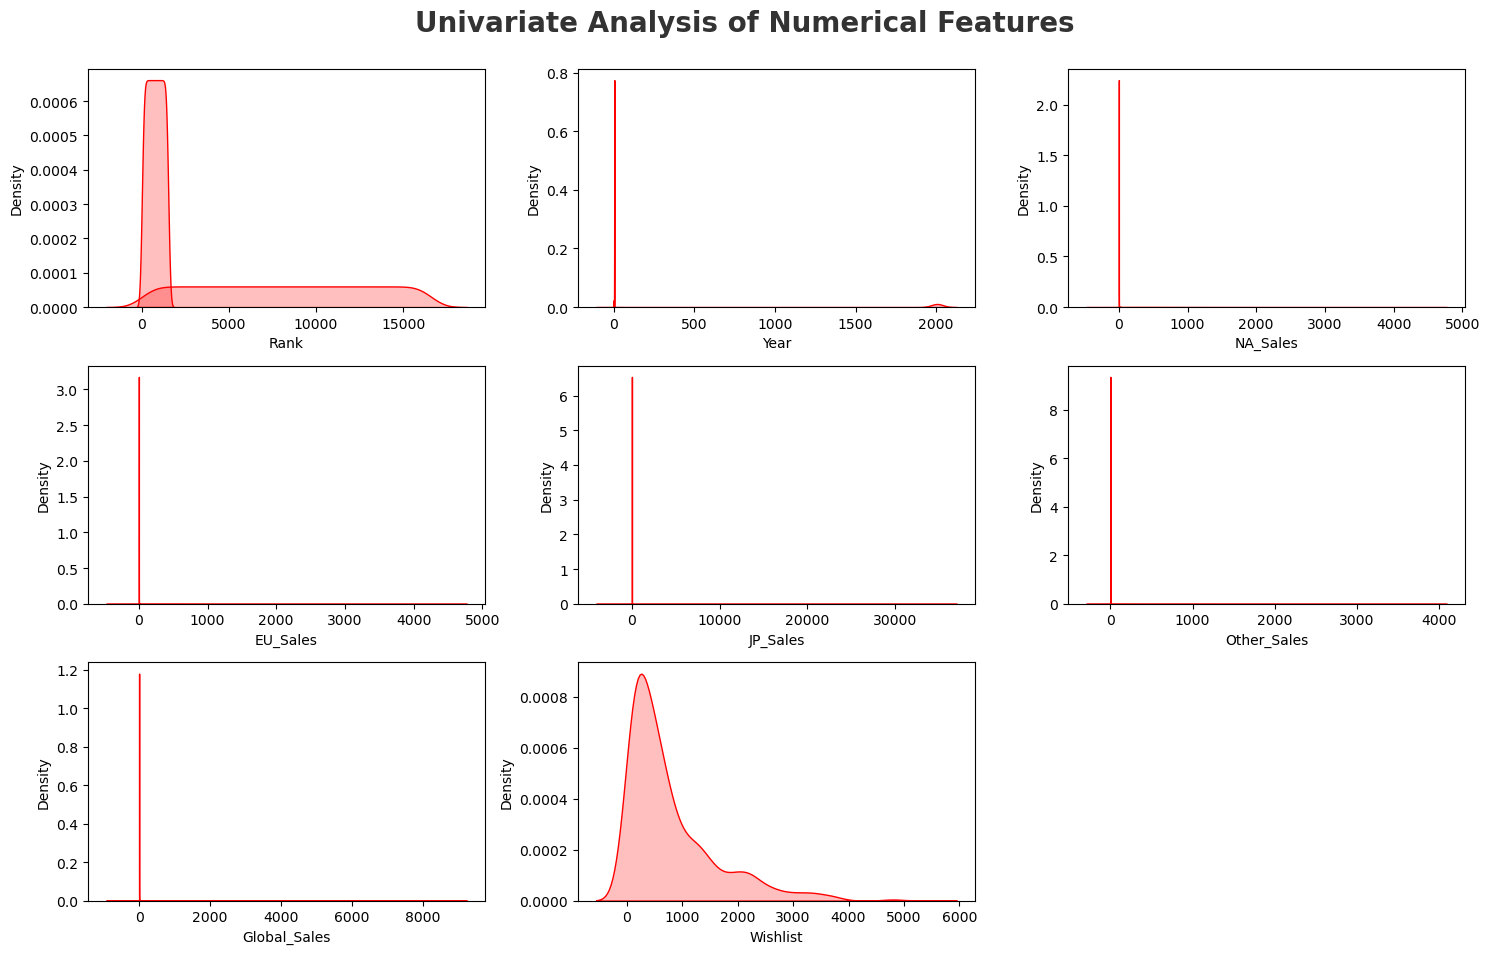

In [303]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features_games)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=games[numeric_features_games[i]],shade=True, color='r')
    plt.xlabel(numeric_features_games[i])
    plt.tight_layout()

for i in range(0, len(numeric_features_vgsales)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=vgsales[numeric_features_vgsales[i]],shade=True, color='r')
    plt.xlabel(numeric_features_vgsales[i])
    plt.tight_layout()



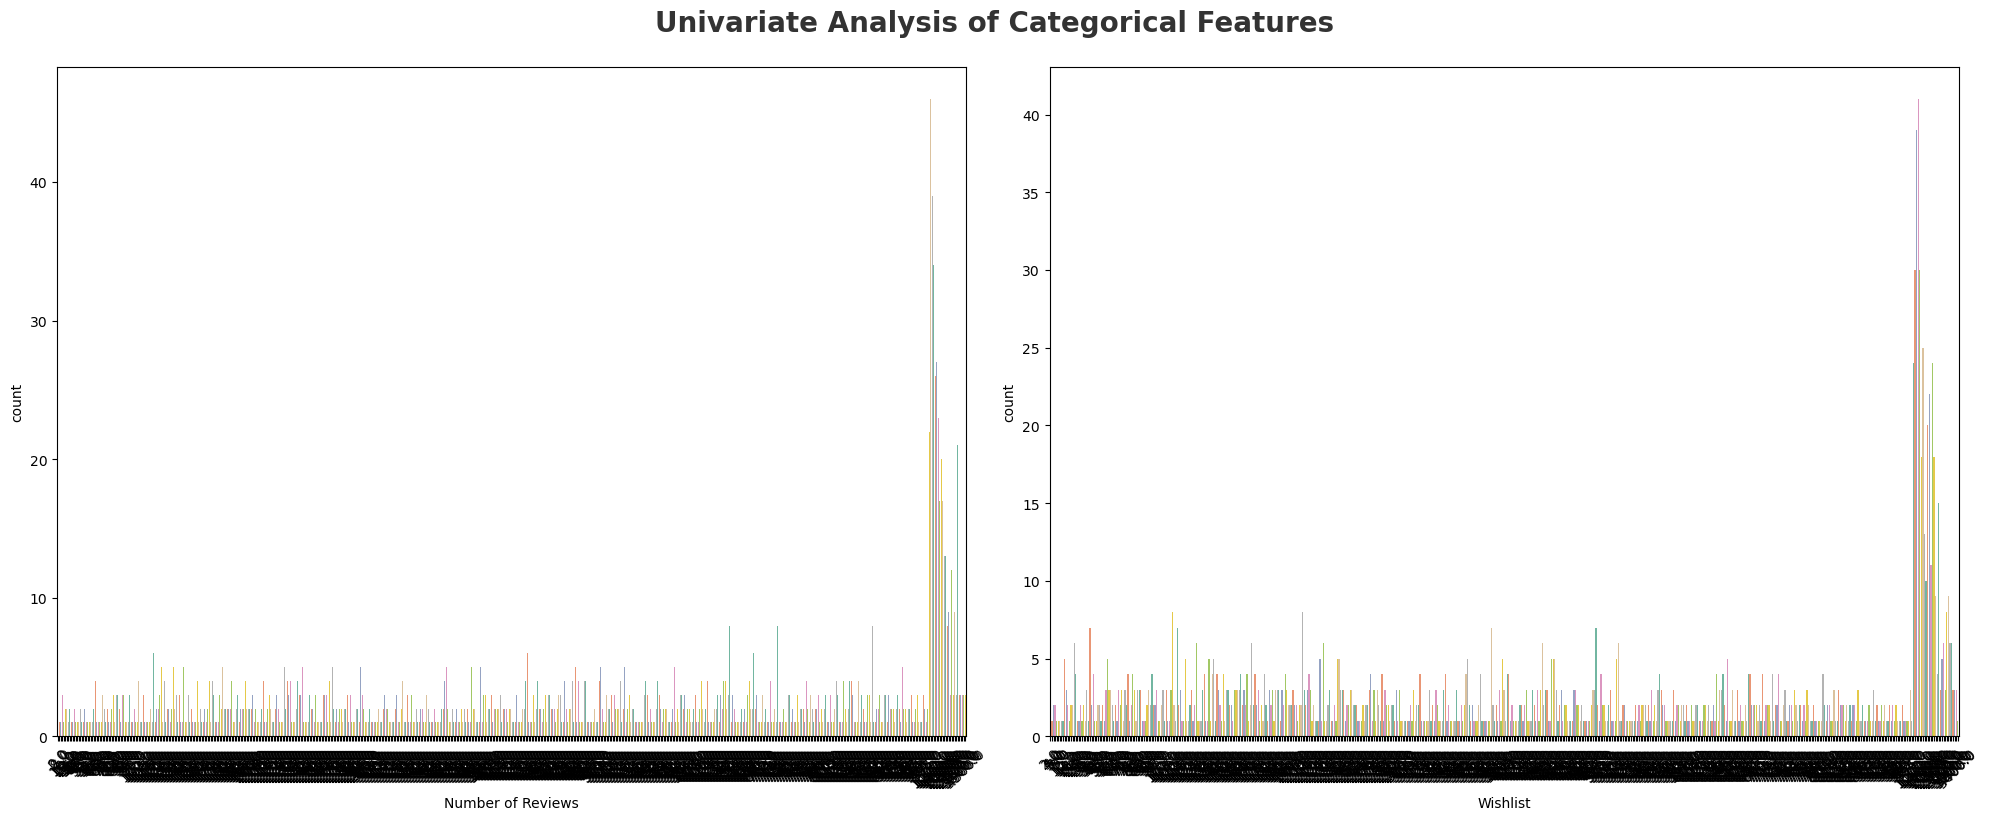

In [304]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Number of Reviews', 'Wishlist']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=games[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    

Question 1: 🌟 What are the top-rated games by user reviews?

In [345]:
df = pd.read_csv("games_cleaned.csv")

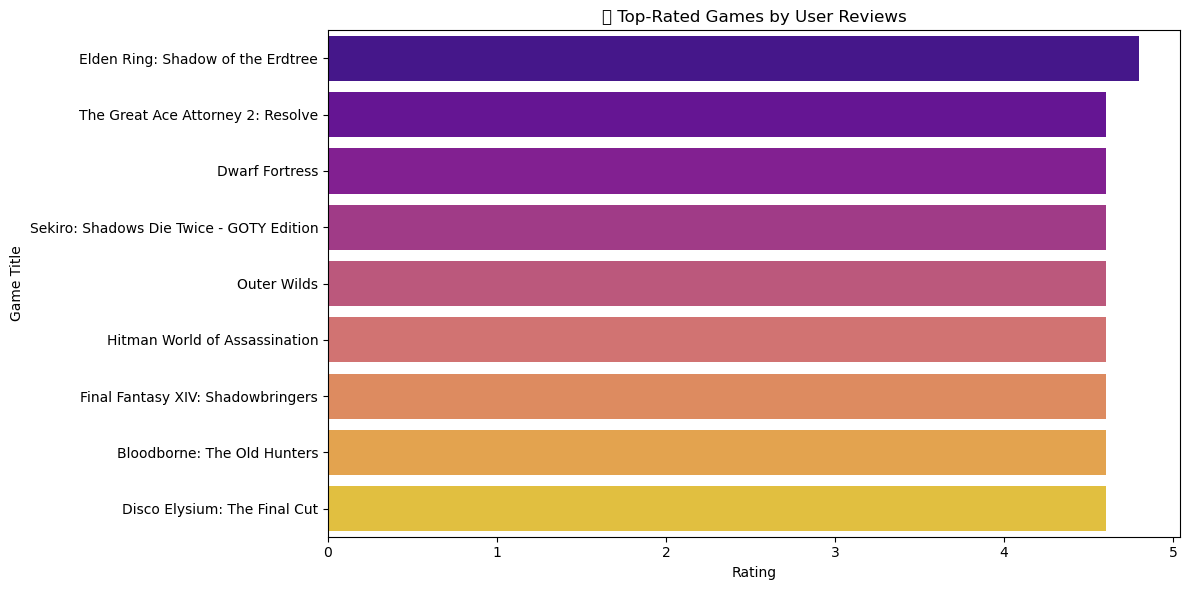

In [346]:
top_games = df.sort_values('Rating', ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=top_games, x='Rating', y='Title', palette='plasma')
plt.title("🌟 Top-Rated Games by User Reviews")
plt.xlabel("Rating")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

Question 2: 🧑‍🤝‍🧑 Which developers (Teams) have the highest average ratings?

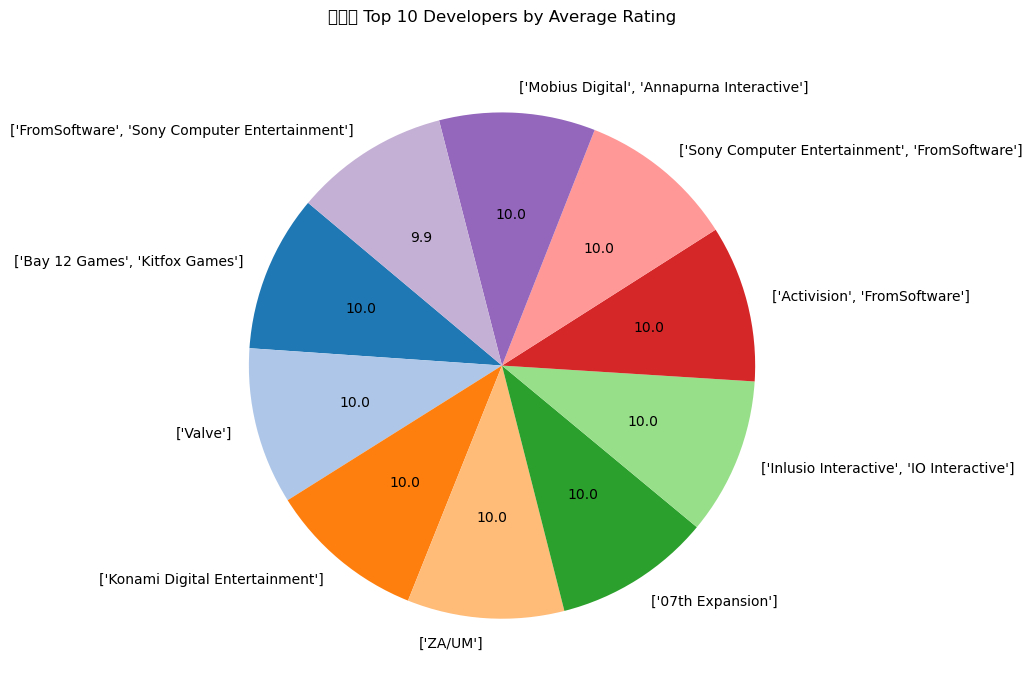

In [307]:
top_teams = (
    df.groupby('Team')['Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('tab20').colors  # variety of colors
plt.pie(
    top_teams,
    labels=top_teams.index,
    autopct='%1.1f',
    startangle=140,
    colors=colors
)
plt.title("🧑‍🤝‍🧑 Top 10 Developers by Average Rating", pad=20)
plt.tight_layout()
plt.show()

Question 3: 🧩 What are the most common genres in the dataset?


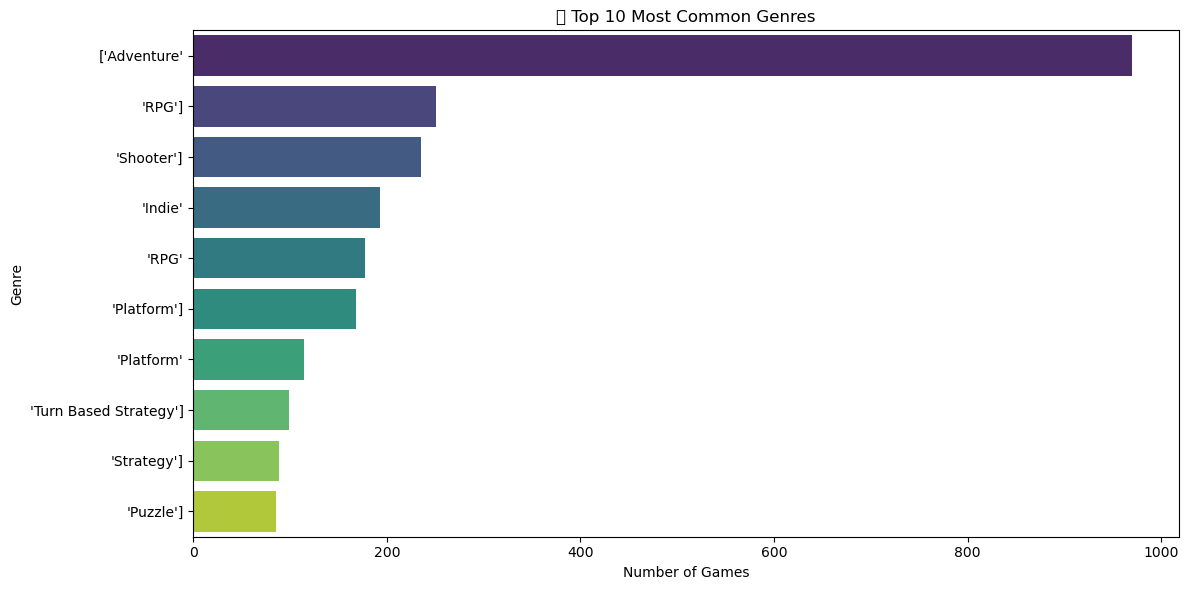

In [308]:
df['Genres'].fillna('Unknown', inplace=True)
all_genres = df['Genres'].str.split(',', expand=True).stack().str.strip()
genre_counts = all_genres.value_counts().head(10)


plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.xlabel("Number of Games")
plt.ylabel("Genre")
plt.title("🧩 Top 10 Most Common Genres")
plt.tight_layout()
plt.show()

Question 4: ⏳ Which games have the highest backlog compared to wishlist?


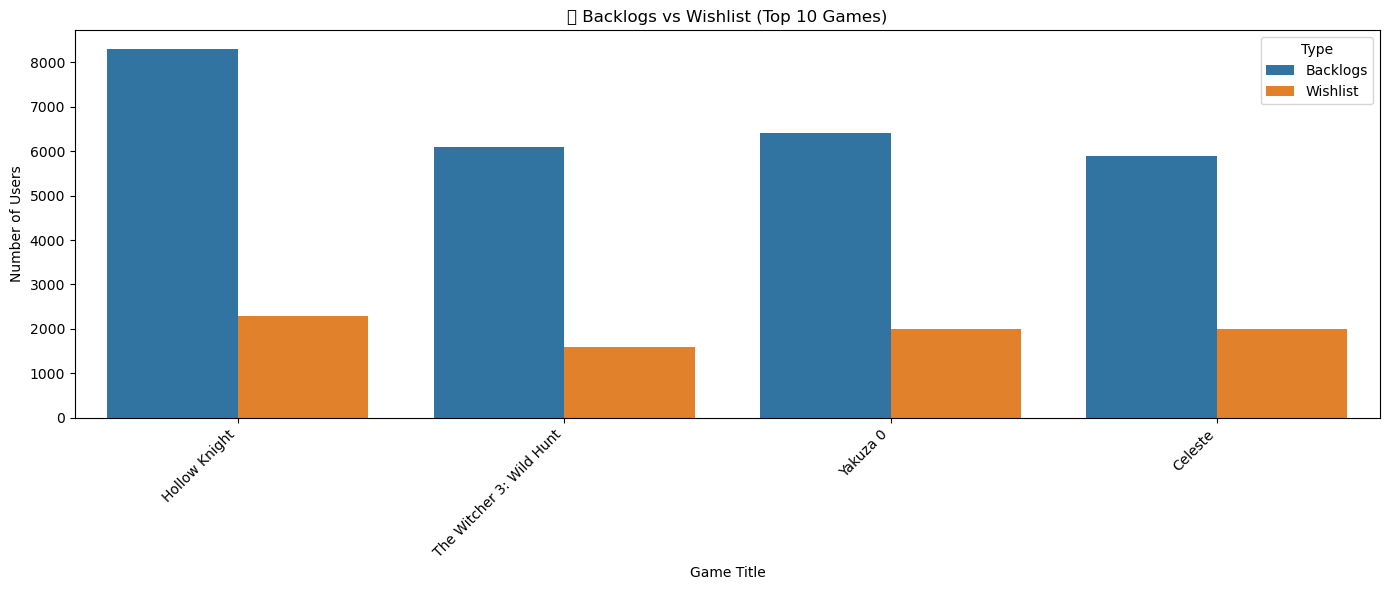

In [309]:
#Seaborn Grouped Bar Chart

games['Backlog_vs_Wishlist'] = games['Backlogs'] - games['Wishlist']

# Prepare top 10 games by backlog difference
top_games = (
    games.assign(diff=games['Backlogs'] - games['Wishlist'])
    .sort_values(by='diff', ascending=False)
    .head(10)
)

# Reshape data for seaborn
plot_data = top_games[['Title', 'Backlogs', 'Wishlist']].melt(
    id_vars='Title',
    value_vars=['Backlogs', 'Wishlist'],
    var_name='Type',
    value_name='Count'
)

plt.figure(figsize=(14,6))
sns.barplot(
    data=plot_data,
    x='Title',
    y='Count',
    hue='Type'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Game Title")
plt.ylabel("Number of Users")
plt.title("⏳ Backlogs vs Wishlist (Top 10 Games)")
plt.tight_layout()
plt.show()





Question 5: 🗓️ What is the game release trend across years?

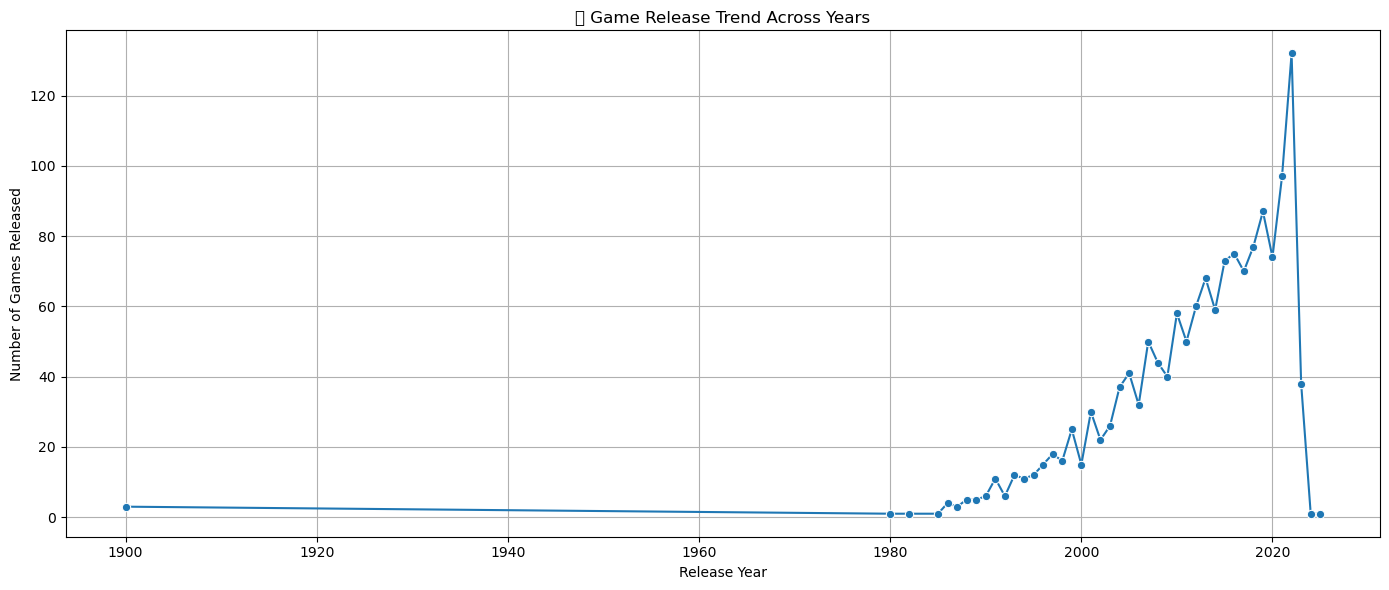

In [310]:
# Reload games and parse date
games = pd.read_csv(
    "games_cleaned.csv",
    parse_dates=['Release Date']
)

# Create Release Year column
games['Release Year'] = games['Release Date'].dt.year

games_yearly = games[
    (games['Release Year'] >= 1900) &
    (games['Release Year'] <= 2025)
]


yearly_releases = (
    games_yearly.groupby('Release Year')
    .size()
    .reset_index(name='Number of Games')
)

plt.figure(figsize=(14,6))
sns.lineplot(
    data=yearly_releases,
    x='Release Year',
    y='Number of Games',
    marker='o'
)

plt.xlabel("Release Year")
plt.ylabel("Number of Games Released")
plt.title("🗓️ Game Release Trend Across Years")
plt.grid(True)
plt.tight_layout()
plt.show()



Question 6: 🔎 What is the distribution of user ratings?

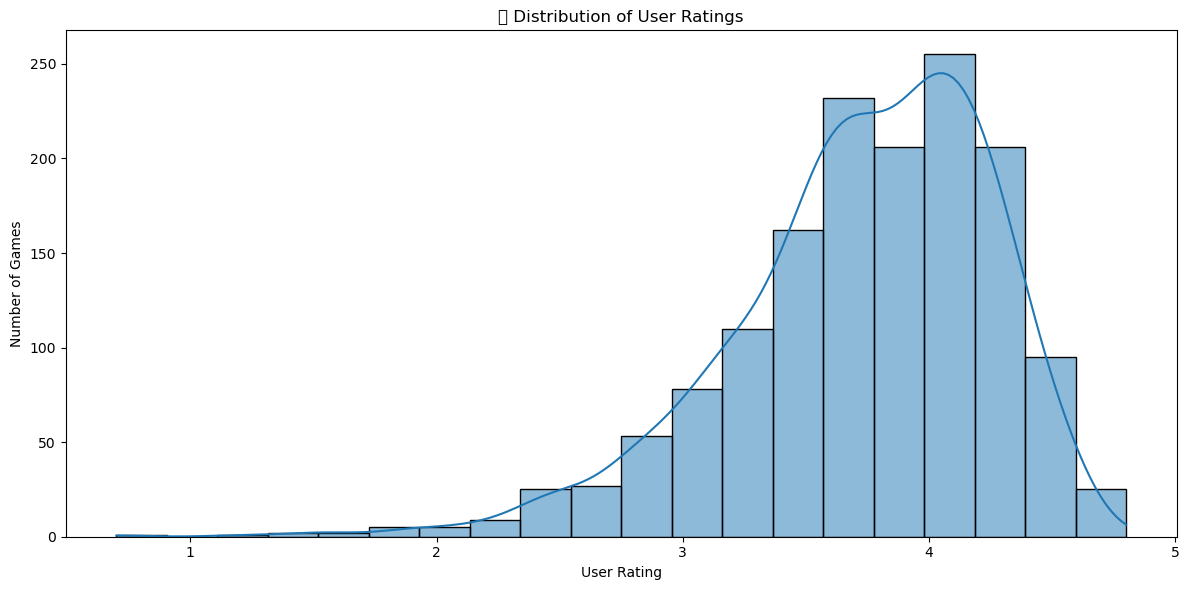

In [311]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df[df['Rating'] > 0] 


plt.figure(figsize=(12,6))
sns.histplot(
    df['Rating'],
    bins=20,
    kde=True
)

plt.xlabel("User Rating")
plt.ylabel("Number of Games")
plt.title("🔎 Distribution of User Ratings")
plt.tight_layout()
plt.show()


Question 7: 🧑 What are the top 10 most wishlisted games?


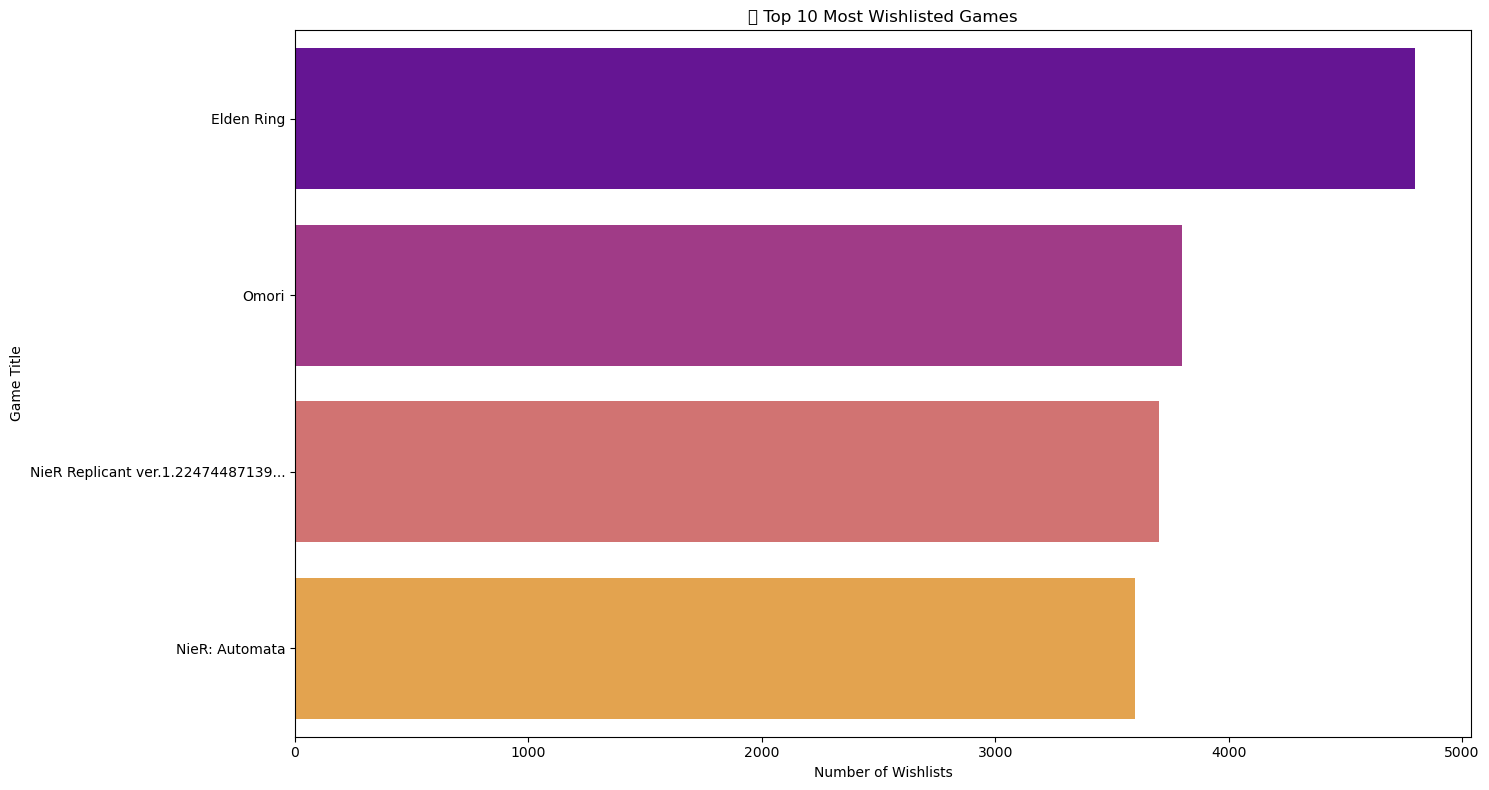

In [312]:
df['Wishlist'] = pd.to_numeric(df['Wishlist'], errors='coerce').fillna(0)

top10_wishlisted = df[df['Wishlist'] > 0].sort_values(by='Wishlist', ascending=False).head(10)

top10_wishlisted

#visualization 

plt.figure(figsize=(15,8))
sns.barplot(
    x='Wishlist',
    y='Title',
    data=top10_wishlisted,
    palette="plasma"
)

plt.title("🔥 Top 10 Most Wishlisted Games")
plt.xlabel("Number of Wishlists")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

Question 8: 🔬 What’s the average number of plays per genre?

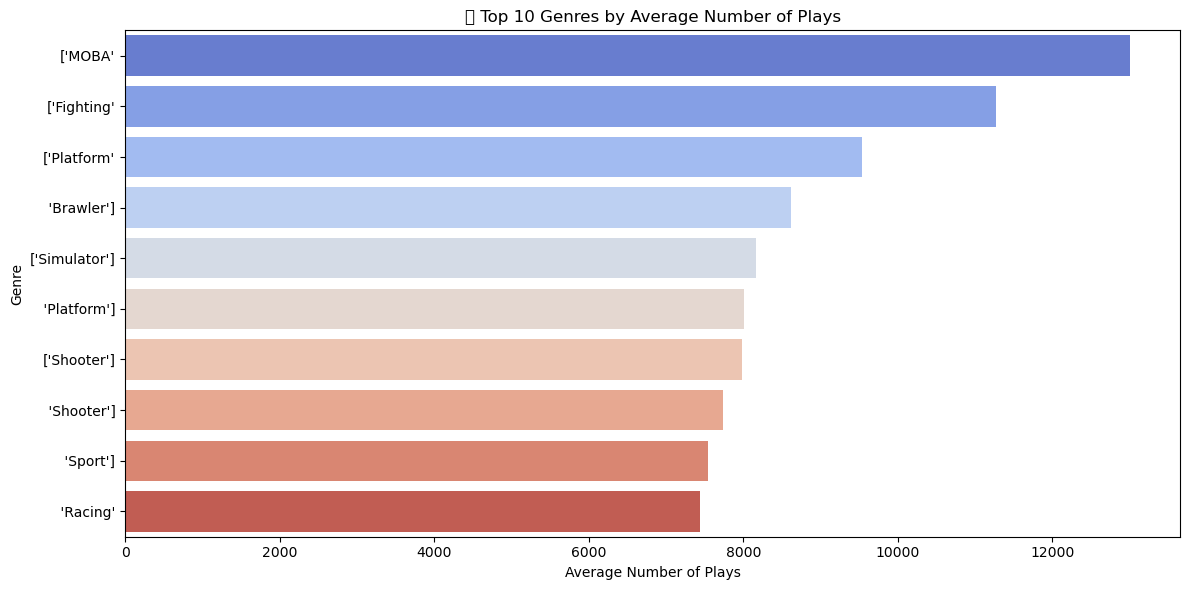

In [313]:
# Split genres and explode so each genre 
genre_plays = df.assign(Genre=df['Genres'].str.split(',')).explode('Genre')


# Calculate average plays per genre
avg_plays_per_genre = genre_plays.groupby('Genre')['Plays'].mean().sort_values(ascending=False).head(10)


# Visualization
plt.figure(figsize=(12,6))
sns.barplot(
    x=avg_plays_per_genre.values,
    y=avg_plays_per_genre.index,
    palette='coolwarm'
)
plt.xlabel("Average Number of Plays")
plt.ylabel("Genre")
plt.title("🔬 Top 10 Genres by Average Number of Plays")
plt.tight_layout()
plt.show()


Question 9: 🏢 Which developer studios are the most productive and impactful?


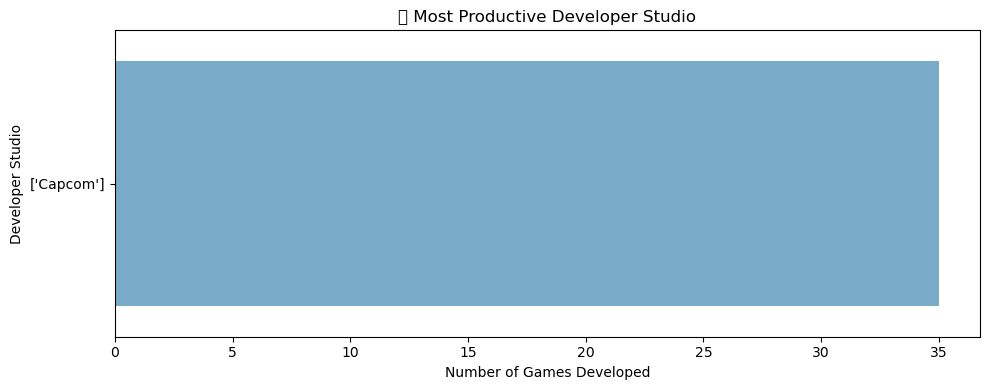

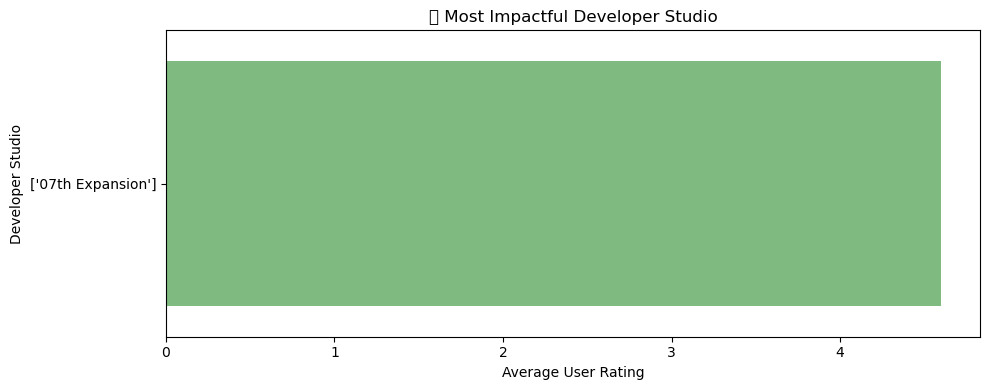

In [314]:
# Group by Team and temporarily rename columns
temp_stats = df.groupby('Team').agg(
    Games_Produced=('Title', 'count'),
    Avg_Rating=('Rating', 'mean'),
    Total_Plays=('Plays', 'sum')
)

# --- Most Productive Studio ---
top_prod = temp_stats['Games_Produced'].idxmax()
plt.figure(figsize=(10,4))
sns.barplot(
    x=[temp_stats.loc[top_prod, 'Games_Produced']],
    y=[top_prod],
    palette='Blues_r'
)
plt.xlabel("Number of Games Developed")
plt.ylabel("Developer Studio")
plt.title("🏢 Most Productive Developer Studio")
plt.tight_layout()
plt.show()

# --- Most Impactful Studio ---
top_impact = temp_stats['Avg_Rating'].idxmax()
plt.figure(figsize=(10,4))
sns.barplot(
    x=[temp_stats.loc[top_impact, 'Avg_Rating']],
    y=[top_impact],
    palette='Greens_r'
)
plt.xlabel("Average User Rating")
plt.ylabel("Developer Studio")
plt.title("✨ Most Impactful Developer Studio")
plt.tight_layout()
plt.show()


Question 10: 🌍 Which region generates the most game sales?


In [315]:
df = pd.read_csv("vgsales_cleaned.csv")

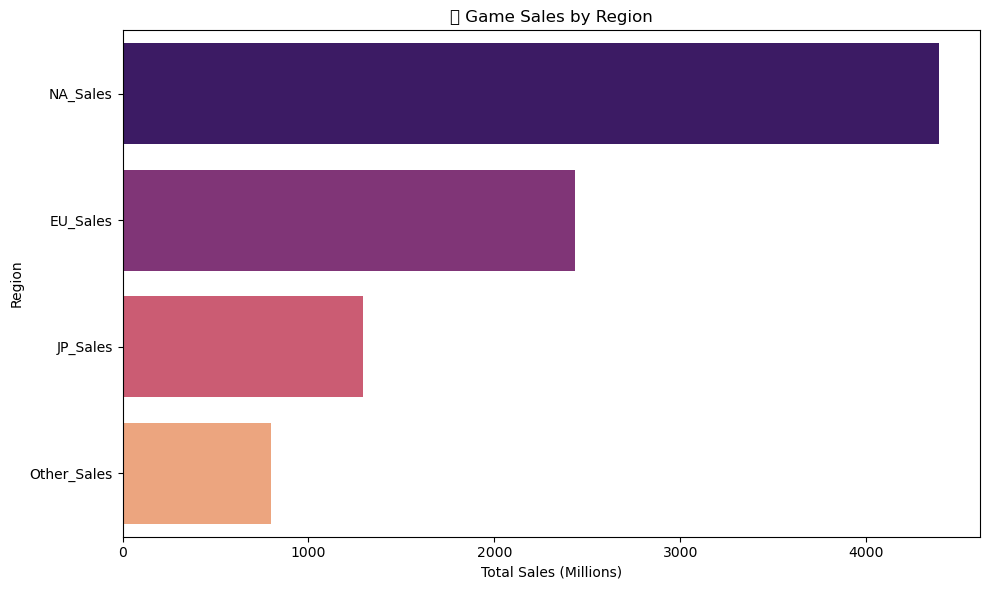

In [316]:
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for col in sales_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    # Sum sales by region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sort_values(ascending=False)


# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='magma')
plt.xlabel("Total Sales (Millions)")
plt.ylabel("Region")
plt.title("🌍 Game Sales by Region")
plt.tight_layout()
plt.show()


Question 11: 🕹️ What are the best-selling platforms?


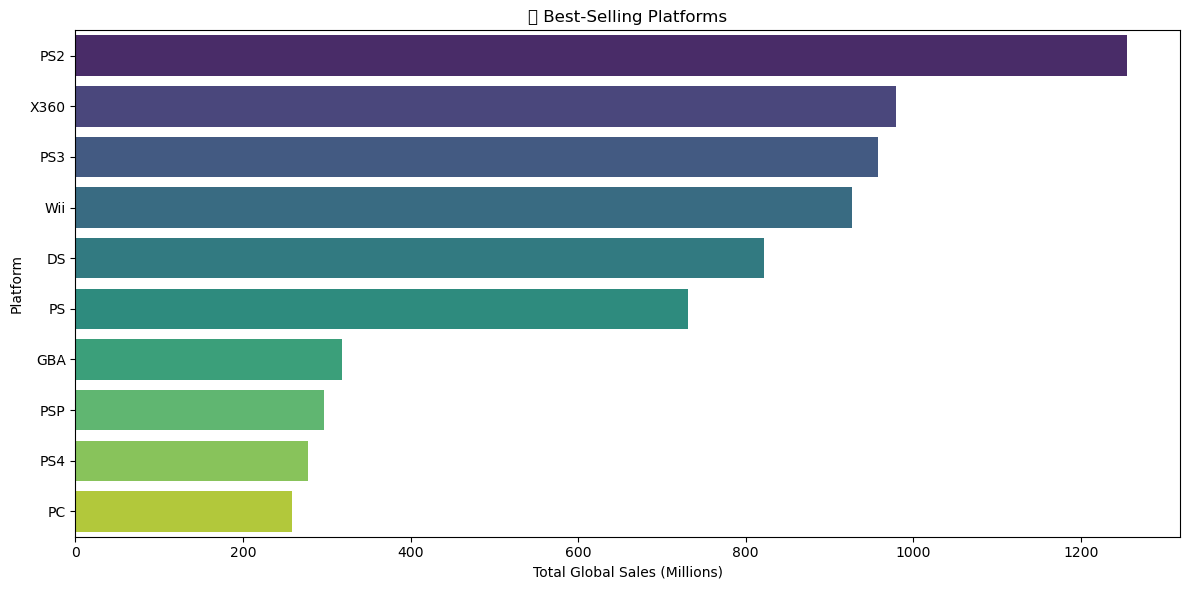

In [317]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(
    x=platform_sales.values[:10], 
    y=platform_sales.index[:10], 
    palette='viridis'
)
plt.xlabel("Total Global Sales (Millions)")
plt.ylabel("Platform")
plt.title("🕹️ Best-Selling Platforms")
plt.tight_layout()
plt.show()

Question 12: 📅 What’s the trend of game releases and sales over years?

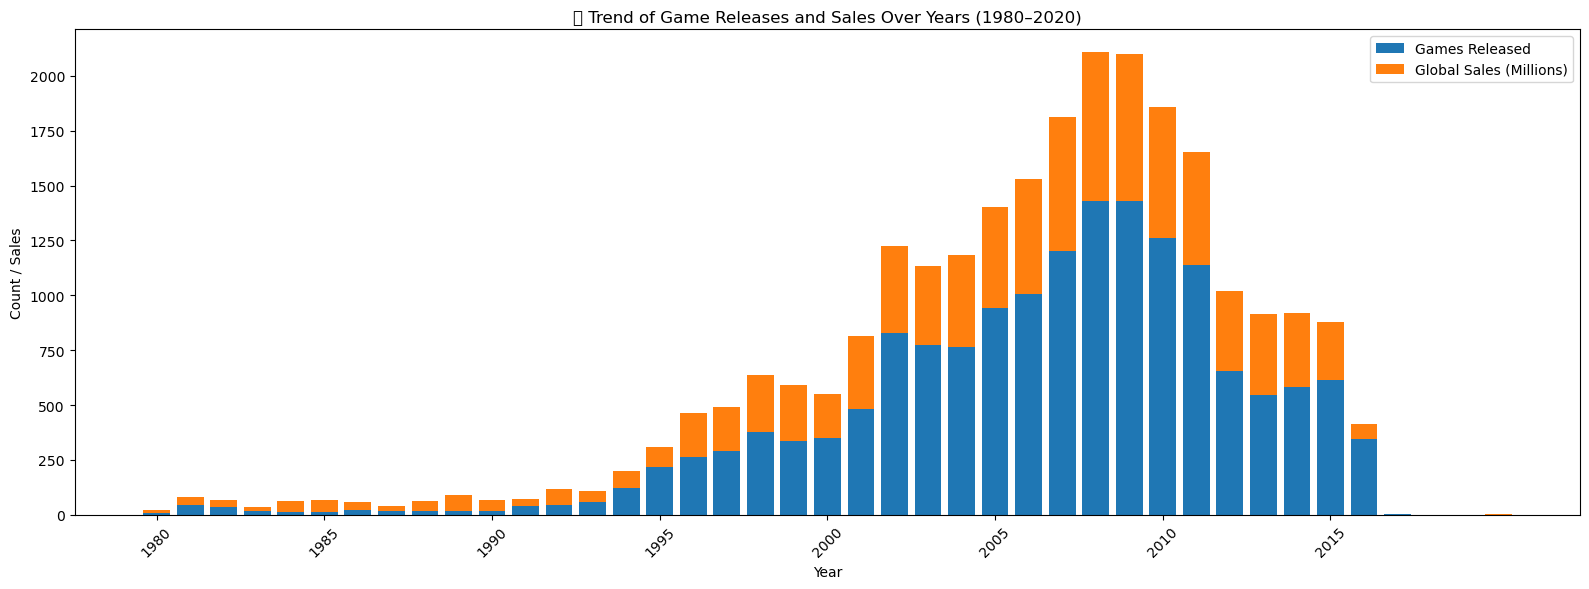

In [318]:
# Filter years
df = df[(df['Year'] >= 1980) & (df['Year'] <= 2020)]

# Aggregate data
yearly_trend = df.groupby('Year').agg(
    Games_Released=('Name', 'count'),
    Total_Sales=('Global_Sales', 'sum')
)

# Plot stacked bar chart
plt.figure(figsize=(16,6))

plt.bar(
    yearly_trend.index,
    yearly_trend['Games_Released'],
    label='Games Released'
)

plt.bar(
    yearly_trend.index,
    yearly_trend['Total_Sales'],
    bottom=yearly_trend['Games_Released'],
    label='Global Sales (Millions)'
)

plt.xlabel("Year")
plt.ylabel("Count / Sales")
plt.title("📅 Trend of Game Releases and Sales Over Years (1980–2020)")
plt.xticks(yearly_trend.index[::5], rotation=45)  # every 5 years
plt.legend()
plt.tight_layout()
plt.show()


Question 13: 🏢 Who are the top publishers by sales?


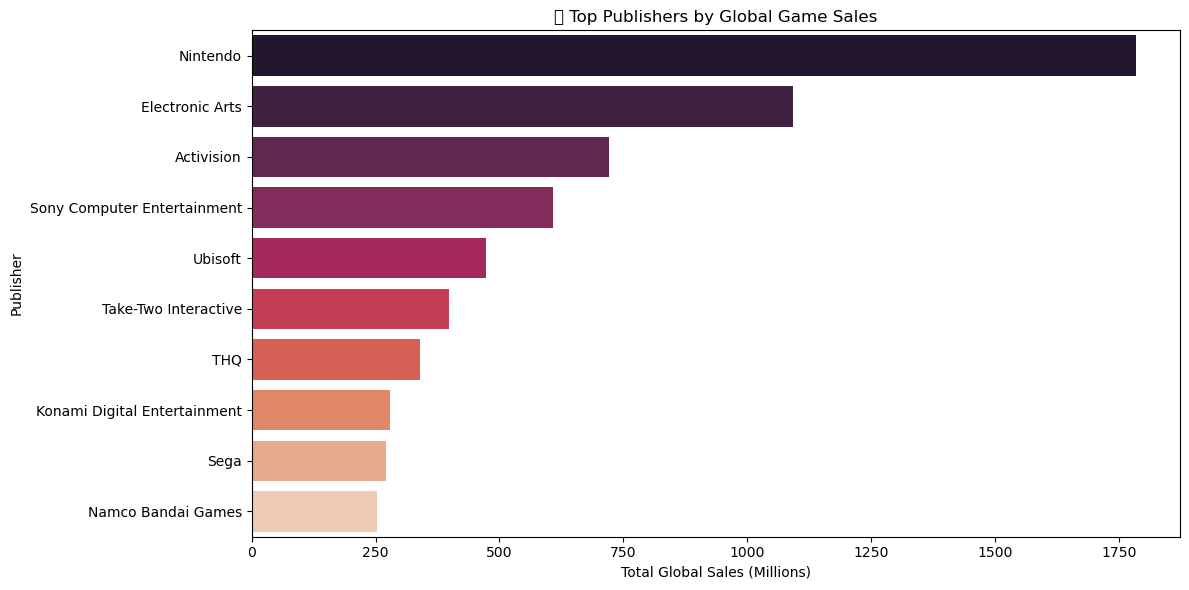

In [319]:
# Group by Publisher and sum sales
publisher_sales = (
    df.groupby('Publisher')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
)
# Visualization
plt.figure(figsize=(12,6))
sns.barplot(
    x=publisher_sales.values[:10],
    y=publisher_sales.index[:10],
    palette='rocket'
)

plt.xlabel("Total Global Sales (Millions)")
plt.ylabel("Publisher")
plt.title("🏢 Top Publishers by Global Game Sales")
plt.tight_layout()
plt.show()

Question 14: 🔝 Which games are the top 10 best-sellers globally?

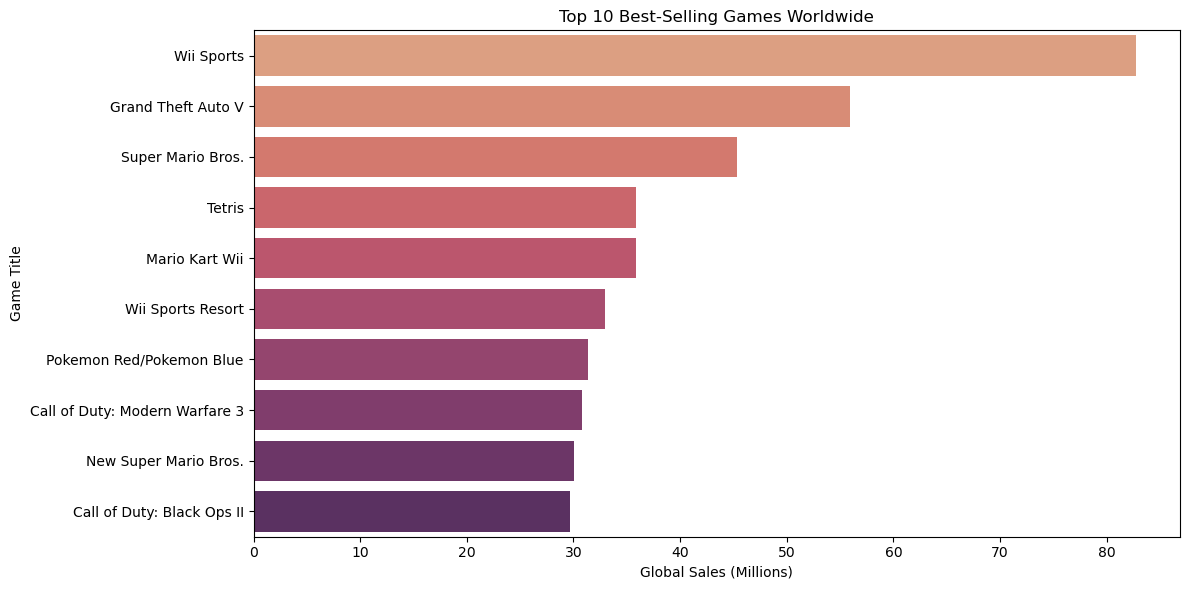

In [320]:
# Group by game title and sum global sales
top_games = (
    df.groupby('Name')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_games.values,
    y=top_games.index,
    palette='flare'
)

plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Title")
plt.title("Top 10 Best-Selling Games Worldwide")
plt.tight_layout()
plt.show()

Question 15: 🧭 How do regional sales compare for specific platforms?

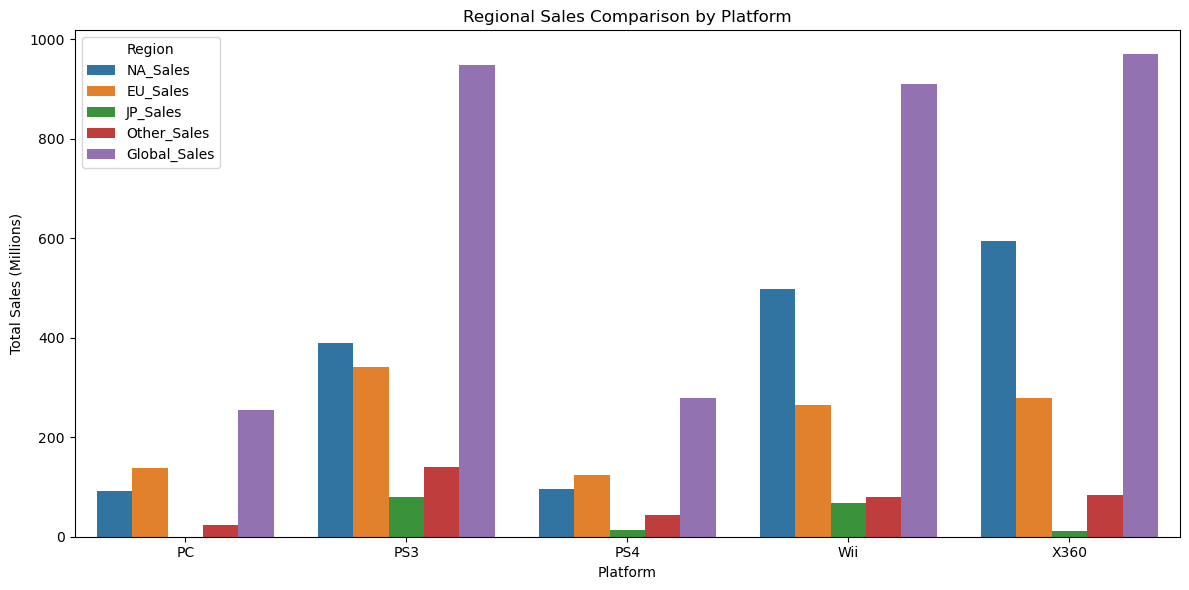

In [321]:
# specific Platforms to compare
platforms = ['PS4', 'X360', 'PS3', 'Wii', 'PC']

# Aggregate sales by platform
plot_data = (
    df[df['Platform'].isin(platforms)]
    .groupby('Platform')[sales_cols]
    .sum()
    .reset_index()
    .melt(id_vars='Platform', var_name='Region', value_name='Sales')
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=plot_data, x='Platform', y='Sales', hue='Region')
plt.xlabel("Platform")
plt.ylabel("Total Sales (Millions)")
plt.title("Regional Sales Comparison by Platform")
plt.tight_layout()
plt.show()

Question 16: 📈 How has the market evolved by platform over time?

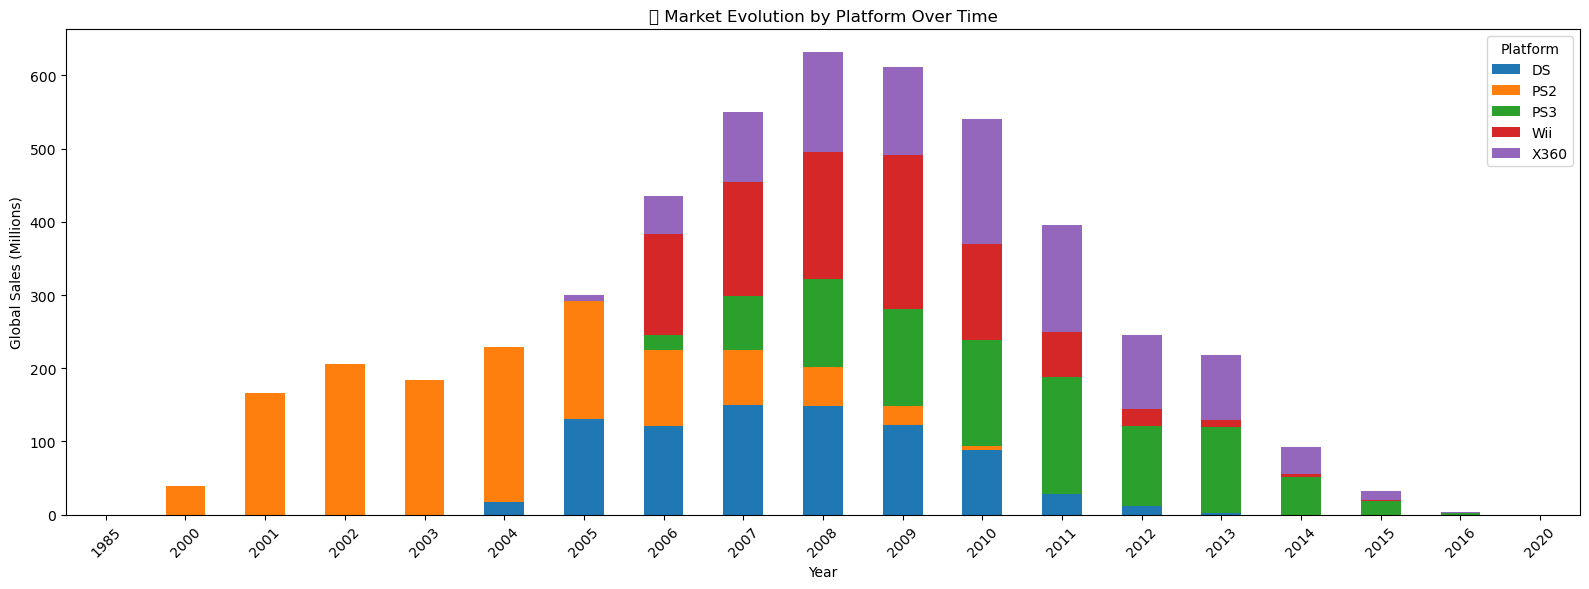

In [322]:
# Filter valid years
df = df[(df['Year'] >= 1980) & (df['Year'] <= 2020)]

# Select top platforms by total sales
top_platforms = (
    df.groupby('Platform')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

df = df[df['Platform'].isin(top_platforms)]

platform_year_sales = (
    df.groupby(['Year', 'Platform'])['Global_Sales']
    .sum()
    .unstack(fill_value=0)
)
platform_year_sales.plot(
    kind='bar',
    stacked=True,
    figsize=(16,6)
)

plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.title("📈 Market Evolution by Platform Over Time")
plt.xticks(rotation=45)
plt.legend(title="Platform")
plt.tight_layout()
plt.show()



Question 17: 📍 What are the regional genre preferences?

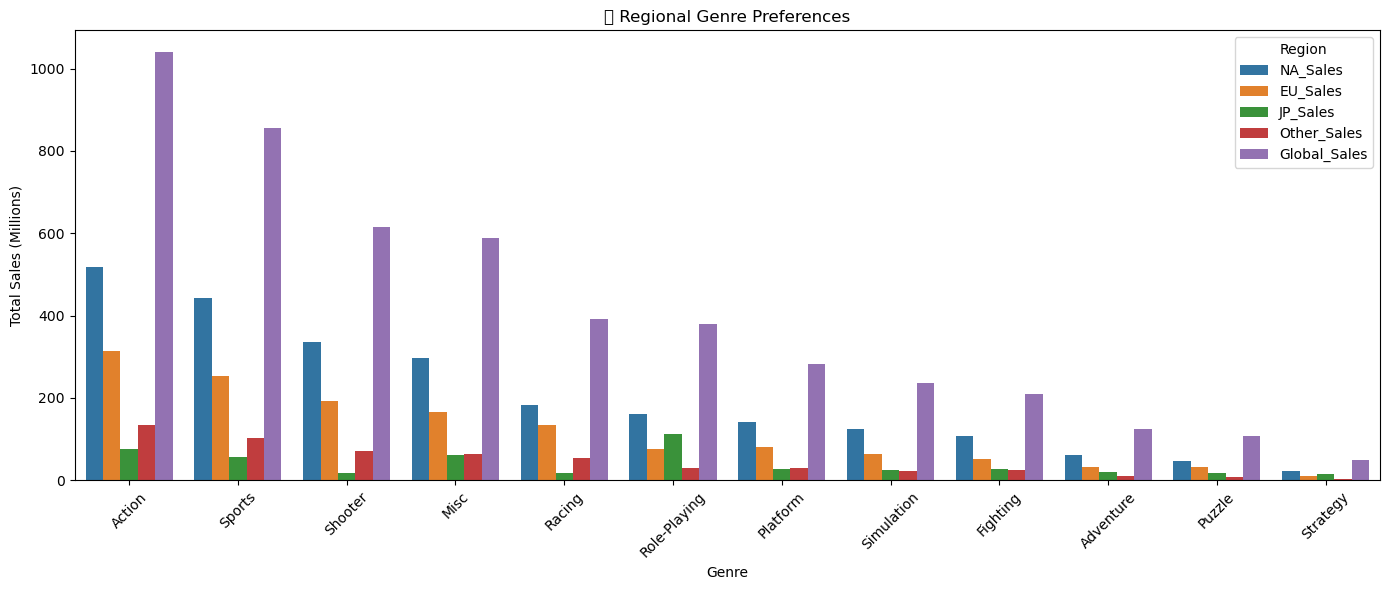

In [323]:
genre_region_sales = (
    df.groupby('Genre')[sales_cols]
    .sum()
    .reset_index()
)
genre_region_sales['Total_Sales'] = genre_region_sales[sales_cols].sum(axis=1)

top_genres = (
    genre_region_sales
    .sort_values(by='Total_Sales', ascending=False)
)

genre_region_sales = top_genres.drop(columns='Total_Sales')

plot_data = genre_region_sales.melt(
    id_vars='Genre',
    value_vars=sales_cols,
    var_name='Region',
    value_name='Sales'
)
plt.figure(figsize=(14,6))

sns.barplot(
    data=plot_data,
    x='Genre',
    y='Sales',
    hue='Region'
)

plt.xlabel("Genre")
plt.ylabel("Total Sales (Millions)")
plt.title("📍 Regional Genre Preferences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Question 18: 🔄 What’s the yearly sales change per region?

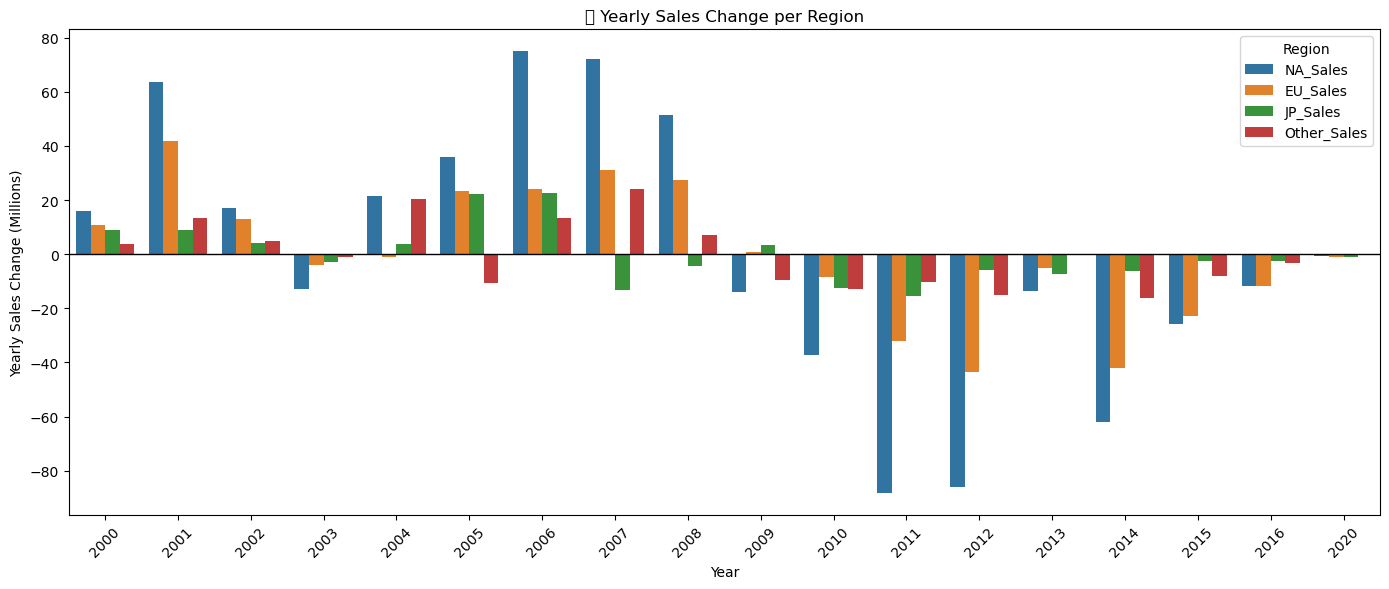

In [324]:
# Aggregate & compute yearly change
yearly_change = df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().diff().dropna().reset_index()

# Melt for plotting
plot_data = yearly_change.melt(id_vars='Year', var_name='Region', value_name='Sales_Change')

# Plot
plt.figure(figsize=(14,6))
sns.barplot(data=plot_data, x='Year', y='Sales_Change', hue='Region')
plt.axhline(0, color='black', linewidth=1)
plt.xlabel("Year")
plt.ylabel("Yearly Sales Change (Millions)")
plt.title("🔄 Yearly Sales Change per Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Question 19: 🧮 What is the average sales per publisher?


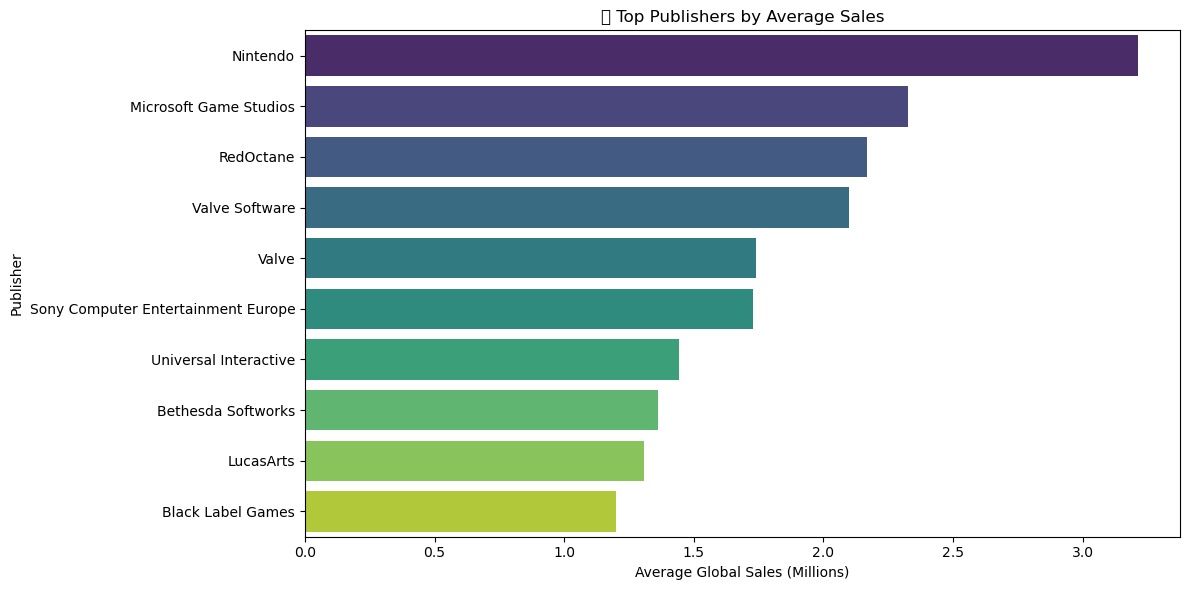

In [325]:
avg_sales = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_sales.values, y=avg_sales.index, palette='viridis')
plt.xlabel("Average Global Sales (Millions)")
plt.ylabel("Publisher")
plt.title("🧮 Top Publishers by Average Sales")
plt.tight_layout()
plt.show()

Question 20: 🏆 What are the top 5 best-selling games per platform?


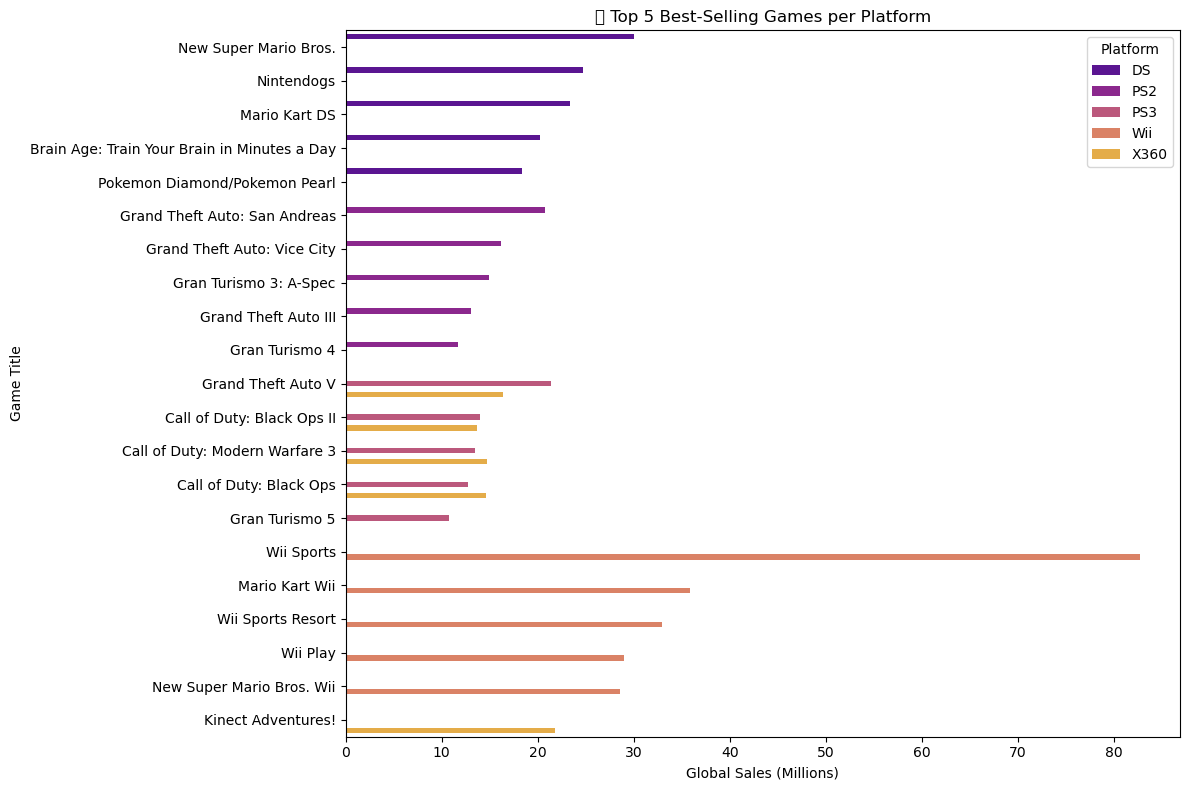

In [326]:

# Get top 5 games per platform
top_games_all = (
    df.groupby(['Platform', 'Name'], as_index=False)['Global_Sales']
      .sum()
      .sort_values(['Platform', 'Global_Sales'], ascending=[True, False])
      .groupby('Platform')
      .head(5)
)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_games_all, 
    x='Global_Sales', 
    y='Name', 
    hue='Platform', 
    dodge=True,  # separates bars by platform
    palette='plasma'
)
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Title")
plt.title("🏆 Top 5 Best-Selling Games per Platform")
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


Question 21: 🎮 Which game genres generate the most global sales?


In [327]:
df = pd.read_csv("games_sales_merged.csv")

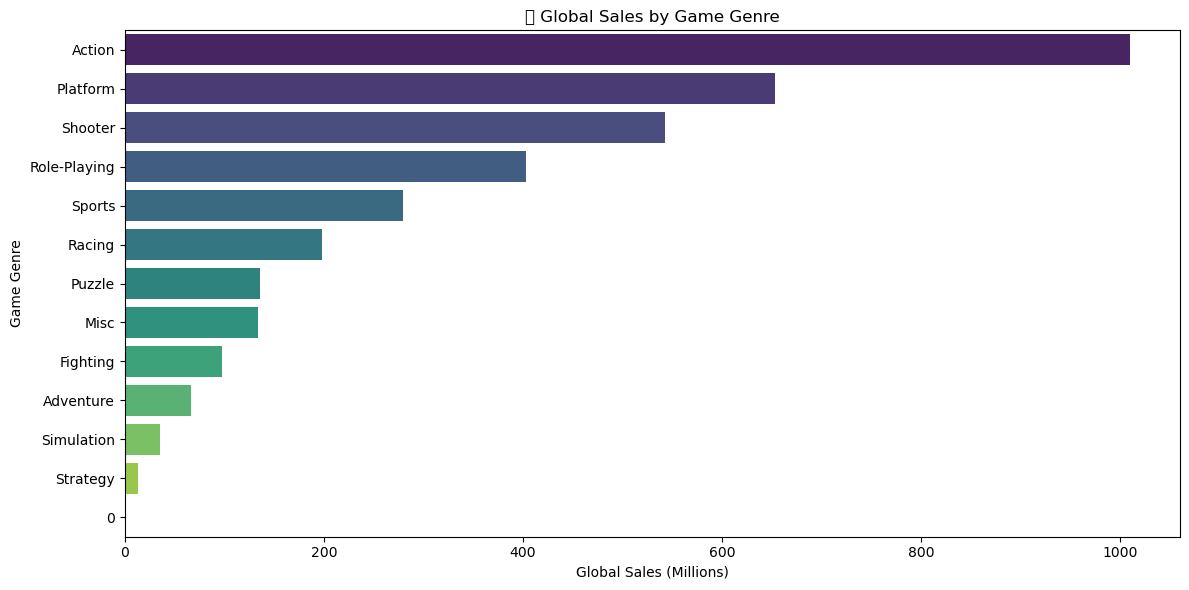

In [328]:
# Sum global sales per genre
genre_sales = (
    df.groupby('Genre', as_index=False)['Global_Sales']
      .sum()
      .sort_values('Global_Sales', ascending=False)
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=genre_sales,
    x='Global_Sales',
    y='Genre',
    palette='viridis'
)
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Genre")
plt.title("🎮 Global Sales by Game Genre")
plt.tight_layout()
plt.show()


Question 22: 🎯 How does user rating affect global sales?

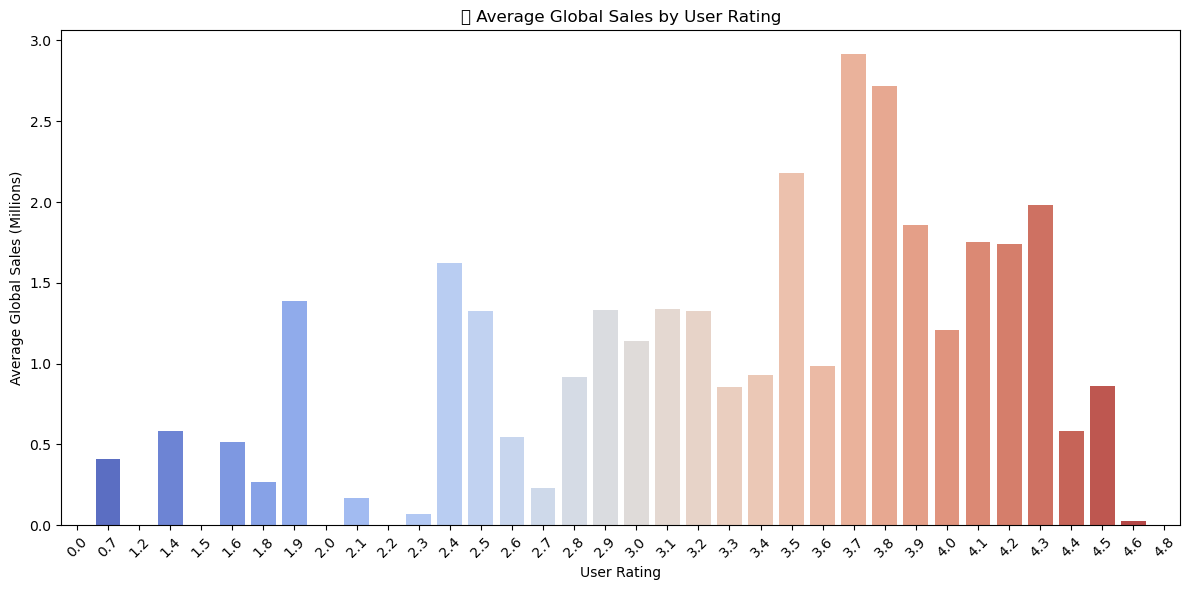

In [329]:
# Calculate average global sales per rating
rating_sales = df.groupby('Rating', as_index=False)['Global_Sales'].mean().sort_values('Rating')

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=rating_sales,
    x='Rating',
    y='Global_Sales',
    palette='coolwarm'
)
plt.xlabel("User Rating")
plt.ylabel("Average Global Sales (Millions)")
plt.title("🎯 Average Global Sales by User Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question 23: 🕹️ Which platforms have the most games with high ratings (e.g., above 4)?


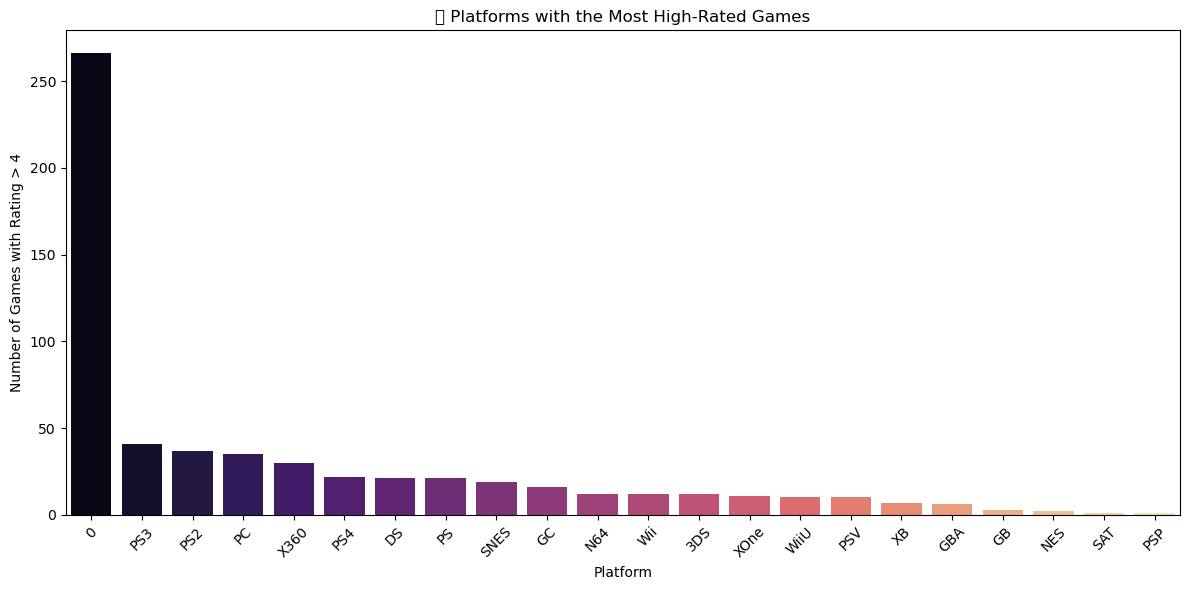

In [330]:
# Filter games with rating > 4
high_rated = df[df['Rating'] > 4]

# Count number of high-rated games per platform
platform_counts = high_rated['Platform'].value_counts().reset_index()
platform_counts.columns = ['Platform', 'High_Rated_Games']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=platform_counts,
    x='Platform',
    y='High_Rated_Games',
    palette='magma'
)
plt.xlabel("Platform")
plt.ylabel("Number of Games with Rating > 4")
plt.title("🕹️ Platforms with the Most High-Rated Games")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Question 24: 📈 What’s the trend of releases and sales over time?

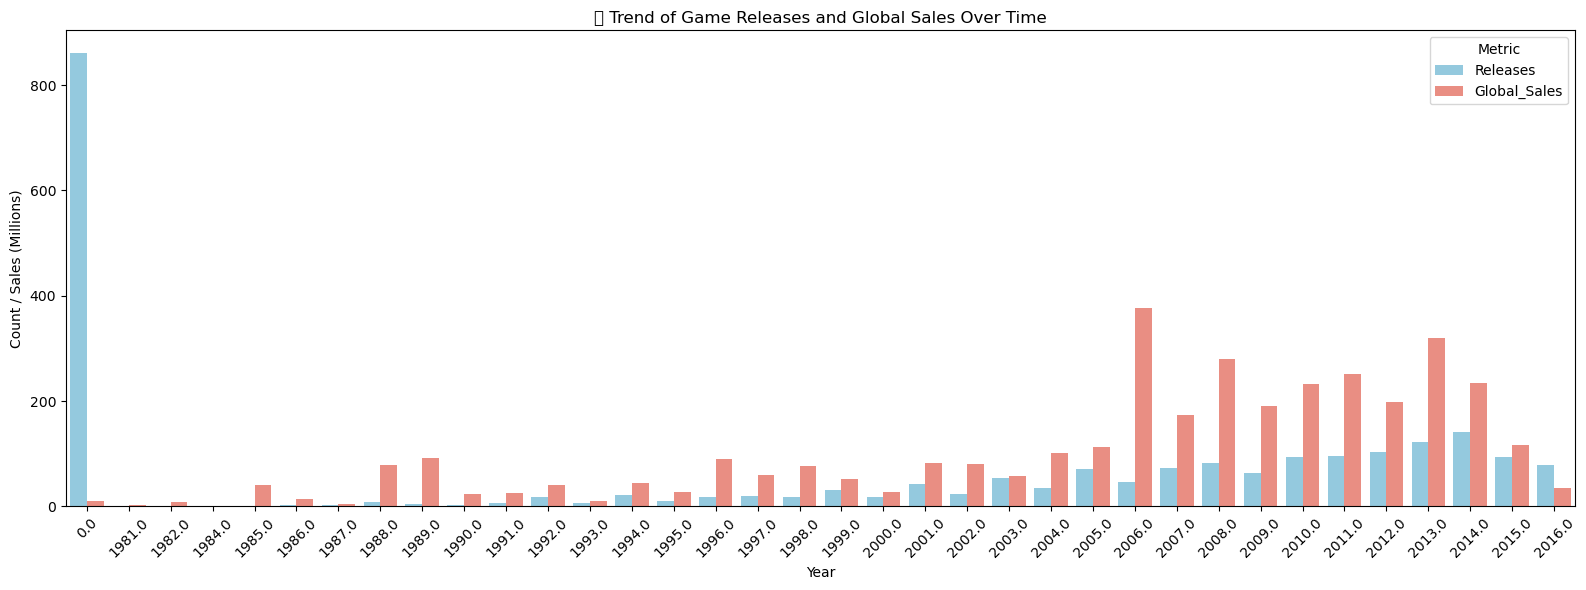

In [331]:
# Aggregate releases and global sales per year
yearly_data = df.groupby('Year', as_index=False).agg(
    Releases=('Title', 'count'),
    Global_Sales=('Global_Sales', 'sum')
).sort_values('Year')

# Melt data for grouped bar plot
yearly_melted = yearly_data.melt(id_vars='Year', value_vars=['Releases', 'Global_Sales'],
                                 var_name='Metric', value_name='Value')

# Plot grouped bar chart
plt.figure(figsize=(16,6))
sns.barplot(
    data=yearly_melted,
    x='Year',
    y='Value',
    hue='Metric',
    palette=['skyblue','salmon']
)
plt.xlabel("Year")
plt.ylabel("Count / Sales (Millions)")
plt.title("📈 Trend of Game Releases and Global Sales Over Time")
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


Question 25:🧍 Do highly wishlisted games lead to more sales?


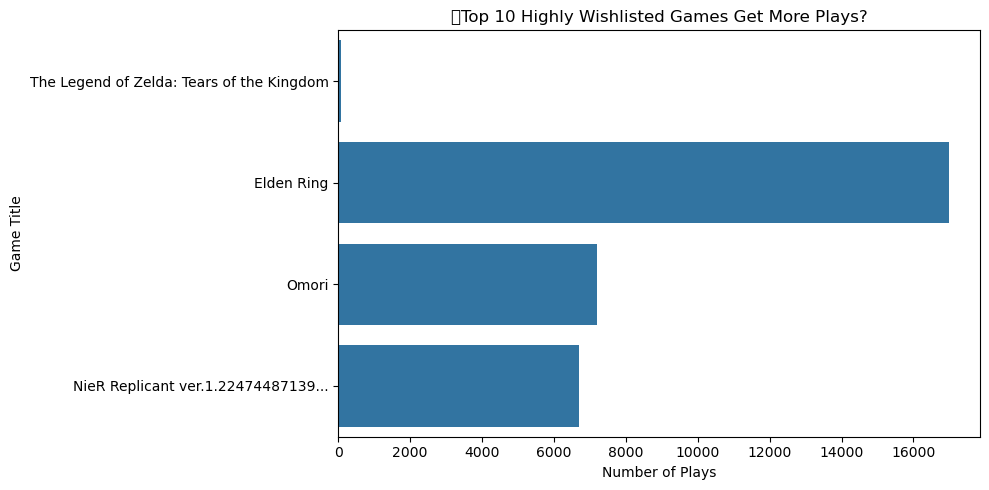

In [332]:
top_high_wishlisted = df.sort_values('Wishlist', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_high_wishlisted,
    x='Plays',
    y='Title'
)
plt.xlabel("Number of Plays")
plt.ylabel("Game Title")
plt.title("🧍Top 10 Highly Wishlisted Games Get More Plays?")
plt.tight_layout()
plt.show()


Question 26: 🎮 Which genres have the highest engagement but lowest sales?


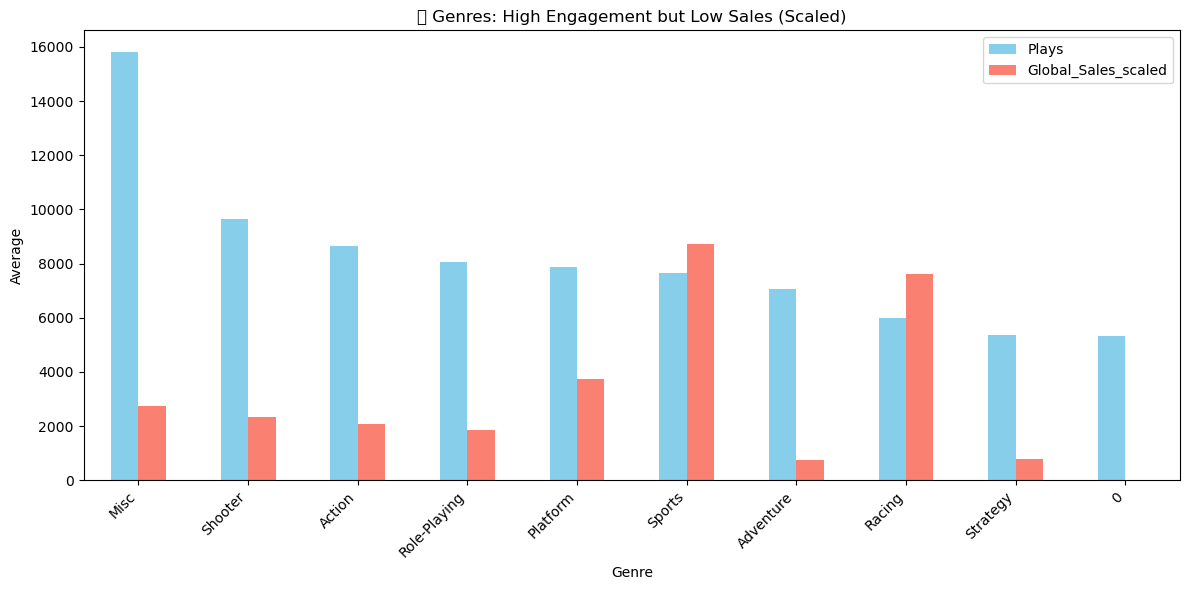

In [333]:
# Aggregate by Genre
genre_stats = df.groupby('Genre')[['Plays','Global_Sales']].mean().reset_index()

# Sort: high Plays, low Sales
high_eng_low_sales = genre_stats.sort_values(['Plays','Global_Sales'], ascending=[False, True]).head(10)

# Scale Global Sales
high_eng_low_sales['Global_Sales_scaled'] = high_eng_low_sales['Global_Sales'] * 1000 #(plays have 4digits value (2000),global sales have 1 one digit value(2),thats why we covert 4 digit for global sales, so we multiply with 1000)

# Plot
high_eng_low_sales.plot(
    x='Genre', y=['Plays','Global_Sales_scaled'], kind='bar', figsize=(12,6), color=['skyblue','salmon']
)
plt.title("🎮 Genres: High Engagement but Low Sales (Scaled)")
plt.ylabel("Average")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Question 27: 🧠 Do highly listed games (wishlist/backlogs) correlate with better ratings?

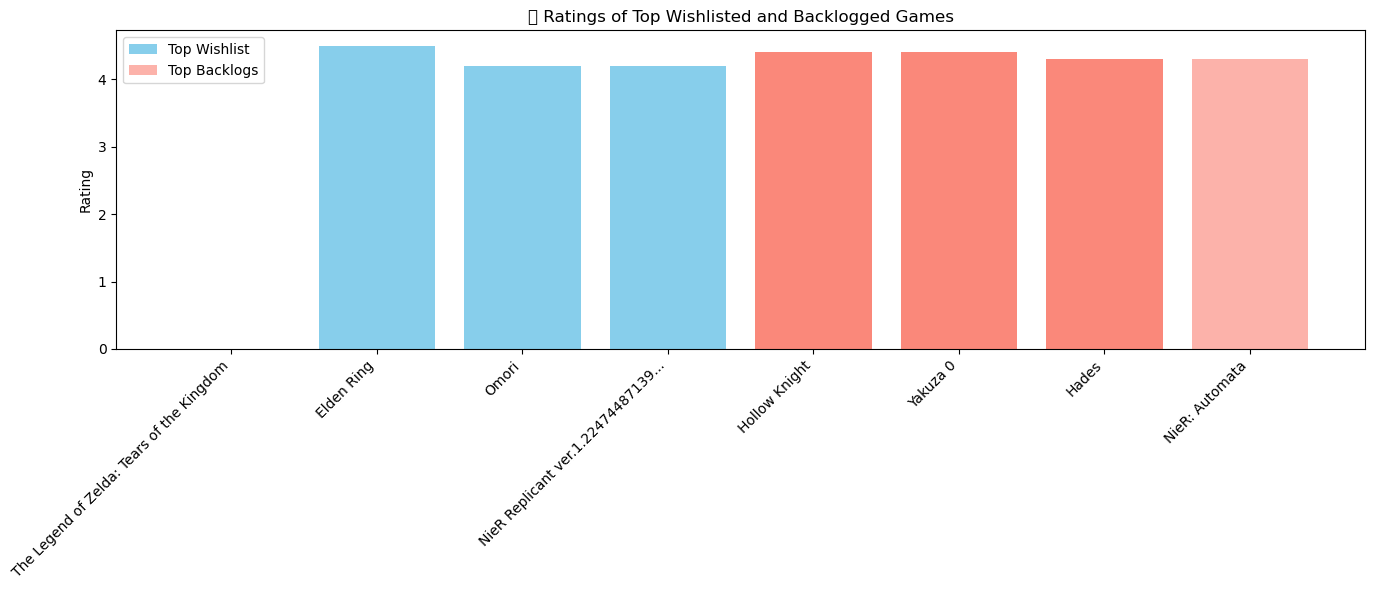

In [334]:
top_wishlist = df.sort_values('Wishlist', ascending=False).head(10)

top_backlogs = df.sort_values('Backlogs', ascending=False).head(10)

plt.figure(figsize=(14,6))

# Wishlist vs Rating
plt.bar(top_wishlist['Title'], top_wishlist['Rating'], color='skyblue', label='Top Wishlist')
# Backlogs vs Rating
plt.bar(top_backlogs['Title'], top_backlogs['Rating'], color='salmon', alpha=0.6, label='Top Backlogs')

plt.xticks(rotation=45, ha='right')
plt.ylabel("Rating")
plt.title("🎮 Ratings of Top Wishlisted and Backlogged Games")
plt.legend()
plt.tight_layout()
plt.show()


Question 28: 🏷️ How does user engagement differ across genres?

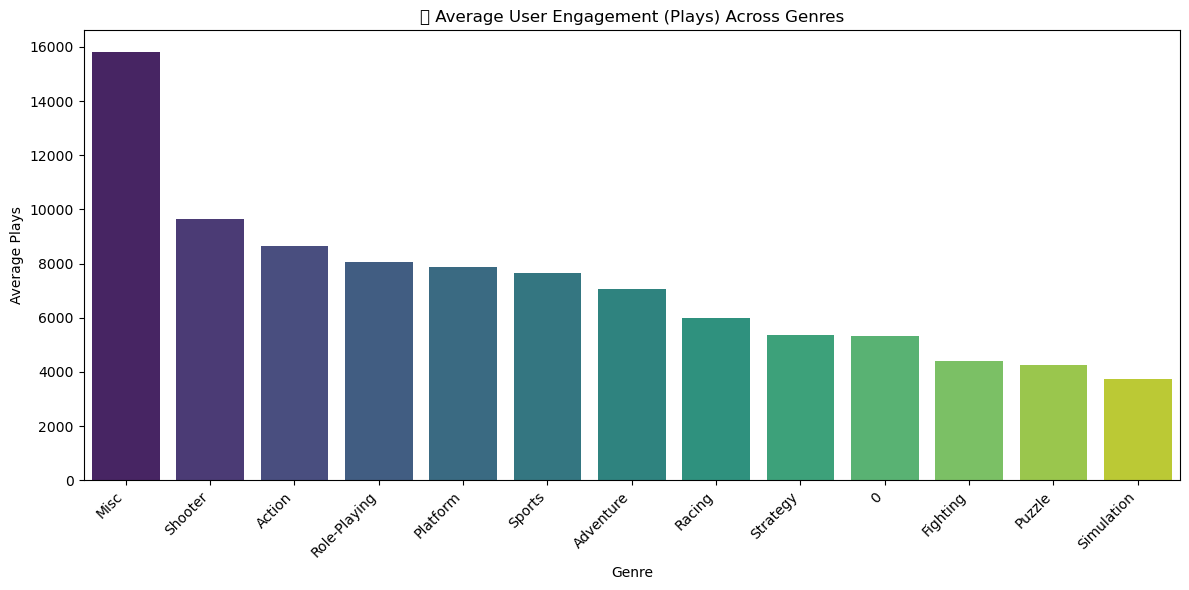

In [335]:
genre_engagement = df.groupby('Genre')['Plays'].mean().reset_index()

genre_engagement = genre_engagement.sort_values('Plays', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=genre_engagement, x='Genre', y='Plays', palette='viridis')

plt.title("🎮 Average User Engagement (Plays) Across Genres")
plt.xlabel("Genre")
plt.ylabel("Average Plays")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Question 29:🎉 What are the top-performing combinations of Genre + Platform?


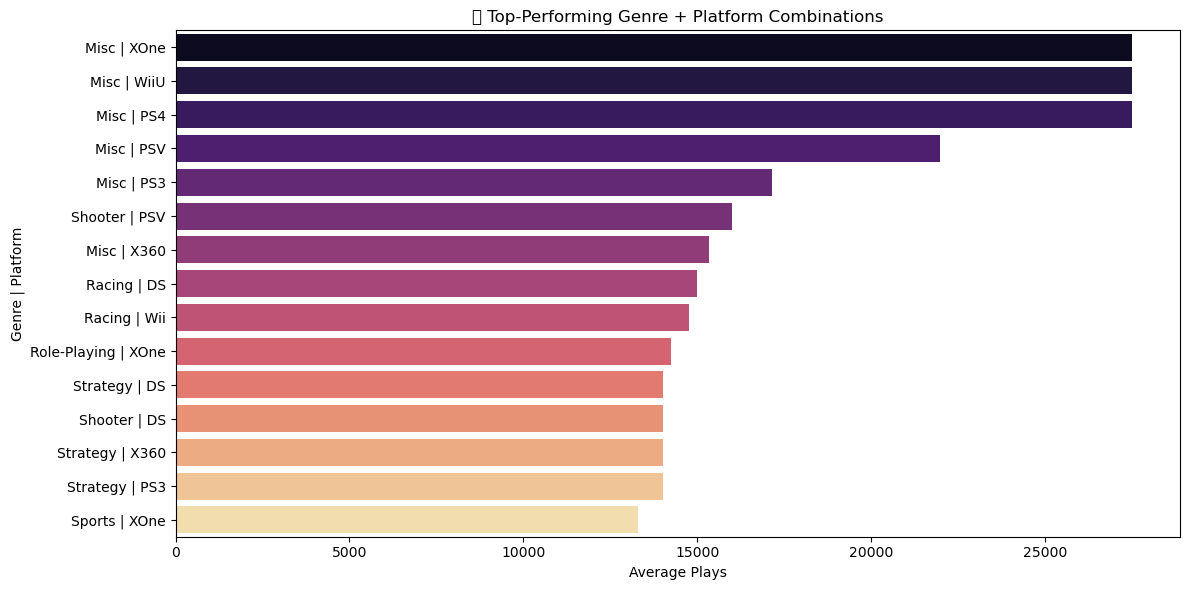

In [336]:
combo_stats = df.groupby(['Genre','Platform']).agg({
    'Plays':'mean',
    'Rating':'mean'
}).reset_index()

# Sort by Plays (or Rating)
top_combos = combo_stats.sort_values('Plays', ascending=False).head(15) 

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_combos, 
    x='Plays', 
    y=top_combos['Genre'] + " | " + top_combos['Platform'], 
    palette='magma'
)
plt.title("🎮 Top-Performing Genre + Platform Combinations")
plt.xlabel("Average Plays")
plt.ylabel("Genre | Platform")
plt.tight_layout()
plt.show()


Question 30: 🌐 What does a regional sales heatmap by genre reveal?

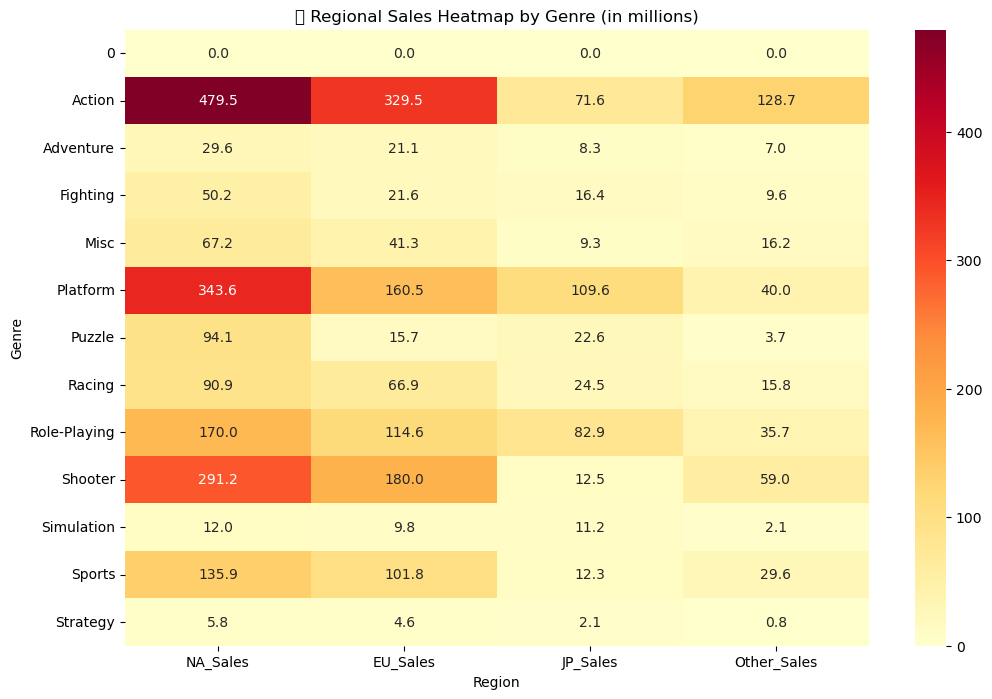

In [337]:
# Assume df has columns: 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'
df_sales = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

plt.figure(figsize=(12,8))
sns.heatmap(df_sales, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("🌐 Regional Sales Heatmap by Genre (in millions)")
plt.xlabel("Region")
plt.ylabel("Genre")
plt.show()
